# Homework 2: Integration at Work
Physics 177, Spring 2017  (Prof. Tanedo)  
**Due**: Tuesday, April 25

William Hicks

## 1. Simpson's Rule, Again

Write another integrator function using **Simpson's rule**. You may adapt your code from Homework 1. The integrator should take the following arguments:
* A function, $f$
* Two real numbers giving the limits of integration, $a$ and $b$
* The number of steps $N$ to sample

This differs from Homework 1, where you specified the $\Delta x$ rather than $N$. There are different ways of implementing Simpson's rule. Here's one example from (5.9) of Newman's *Computational Physics*:

$\displaystyle I(a,b) = \frac{1}{3}\Delta x\left[ f(a) + f(b) + 4 \sum_{k \text{ odd}}^{N-1} f(a+k\Delta x) + 2 \sum_{k \text{ even}}^{N-2} f(a+k\Delta x) \right]$ ,

where the step size is $\Delta x = (b-a)/N$.

You can fill in the following function stub:

In [49]:
import numpy as np

def integrate_HW2(f,a,b,N):
    """
    Integrate f from a to b using Simpson's rule with N steps
    """
    b=float(b)
    a=float(a)
    delta_x=(b-a)/N    
    
    odd_ans=0    
    for k in range(1,N,2):
        odd_ans+=f(a+k*delta_x)
    even_ans=0
    for k in range(2,N-1,2):
        even_ans+=f(a+k*delta_x)
    
    simp=(1.0/3)*delta_x*(f(a)+f(b)+4*odd_ans+2*even_ans)    
    return simp 

Now test this on a nice function:

In [50]:
def test_function(x):
    return 4.0*x**3

integrate_HW2(test_function,0,1,100)

0.9999999999999999

## 2. Diffraction Limit of a Telescope
[Adapted from Exercise 5.4 from *Computational Physics* by Newman]

### Discussion
Our ability to resolve detail in astronomical observations is limited by the diffaction of light in our telescopes.  Light from stars can be treated effectively as coming from a point source at infinity. When such light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we'll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction patter consisting of a central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by

$\displaystyle I(r) = \left(\frac{J_1(kr)}{kr}\right)^2 \ ,$

where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k = 2\pi/\lambda$ and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by

$\displaystyle J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta - x \sin \theta) \, d\theta\ ,$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

### A. Coding the Bessel function

Write a Python function that calculates the value of $J_m(x)$ using Simpson's rule with $N=1000$ points. 

In [51]:
from math import pi as pi
from math import sin as sin
from math import cos as cos

def J(m,x,N=1000):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 steps
    """
    def integrated_function(theta):
        return cos(m*theta-x*sin(theta))
    answer=(1.0/pi)*integrate_HW2(integrated_function,0,pi,N)
    
    return answer

### B. Plotting these Bessel functions
Plot the Bessel functions $J_0$, $J_1$, and $J_2$ from $x=0$ to $x=20$. 

Make sure that you have installed `matplotlib`. You can do this using `pip` at the command line: (`pip` vs `pip3` depends on your installation)  
`pip3 install matplotlib`

Note: if the plot doesn't show up in this notebook, you may need to run  
`%matplotlib inline`
in the notebook

Follow the template at the bottom of https://github.com/Physics177-2017/Lec05-numpyintro/blob/master/Numpy%20Introduction.ipynb

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# %matplotlib inline ## uncomment if necessary

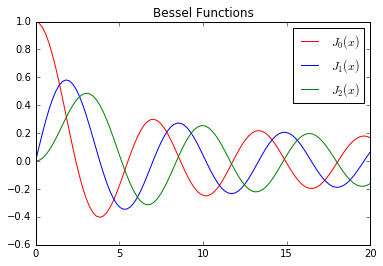

In [53]:
# Create a Numpy array of sampling points
x = np.linspace(0, 20, 100)

# Create a "vectorized" version of J(m,x) that 
# accepts Numpy arrays as arguments
Jnp = np.vectorize(J)

colors=['red','blue','green']
for m in range(0,3):
    plt.plot(x,Jnp(m,x),label='$J_'+str(m)+'(x)$',color=colors[m])

plt.title("Bessel Functions")
plt.legend()
plt.show()

### C. Comparing to Sines

Over the same range as before, plot $J_0(x)$, $J_1(x)$ (as you did above) and the following functions:

$\displaystyle f_0(x) = \sqrt{\frac{2}{\pi x}} \cos\left(\pi - \frac{\pi}{4}\right)$  
$\displaystyle f_1(x) = \sqrt{\frac{2}{\pi x}} \cos\left(\pi - \frac{3\pi}{4}\right)$

*Remark*: the more general formula is:  
$\displaystyle f_m(x) = \sqrt{\frac{2}{\pi x}} \cos\left(\pi - \frac{(2m+1)\pi}{4}\right)$,  
this is supposed to be a good approximation of $J_m(x)$ for large $x$.

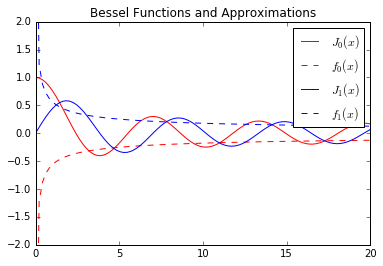

In [54]:
# Write your own functions f0(x) and f1(x),
# then follow the Problem 2B template to plot f0, f1, J0, and J1
x=np.linspace(0.01,20,100)

def fm(m,x):
    return ((2.0/(pi*x))**0.5)*cos(pi-((2*m+1)*pi/4.0))
fmnp=np.vectorize(fm)
colors=['red','blue']

for m in range(0,2):
    color=colors[m]
    plt.plot(x,Jnp(m,x) ,label='$J_'+str(m)+'(x)$',color=color)
    plt.plot(x,fmnp(m,x),label='$f_'+str(m)+'(x)$',color=color,linestyle='--')

ax=plt.subplot(111)
ax.set_ylim(ymin=-2,ymax=2)

plt.title('Bessel Functions and Approximations')
plt.legend()
plt.show()


### D. Plotting Diffraction Patterns

Use the equation for $I(r)$ above to plot the diffraction pattern seen, for example, by a telescope when viewing a point source at the origin. Your plot should look like an **Airy disk**:

![title](https://upload.wikimedia.org/wikipedia/commons/1/14/Airy-pattern.svg)

Image (and discussion) from:
https://en.wikipedia.org/wiki/Airy_disk

For our purposes, use $\lambda = 500~\text{nm}$. Your plot should cover values of $r$ from zero up to $1~\mu\text{m}$. Be careful with units! Numerical functions don't know how to handle units, so you should make sure you're consistent everywhere. I suggest using the Numpy functions **meshgrid** and **pcolormesh**, as demonstrated below.


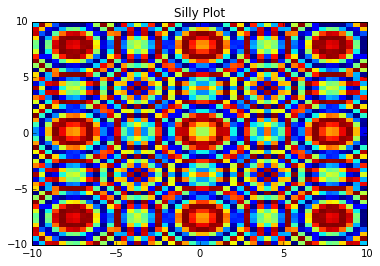

In [55]:
side = np.linspace(-10,10,50)
X,Y = np.meshgrid(side,side)
Z = np.sin(X**2 + Y**2)
plt.pcolormesh(X,Y,Z)
plt.title("Silly Plot")
plt.show()

Try to plot the Airy disk using a variation of the above code, where `Z` is given by $I(r)$, which you have to code in appropriately. 

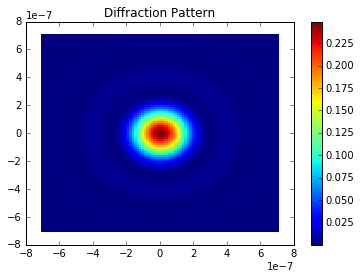

In [56]:
def I(k,r):
    return (J(1,k*r)/(k*r))**2
Inp=np.vectorize(I)
a=(2**-.5)*1e-6
side = np.linspace(-a,a,100)
X,Y = np.meshgrid(side,side)
        
wavelength=500e-9
k=2*pi/wavelength
Z=Inp(k,(X**2+Y**2)**.5)
plt.pcolormesh(X,Y,Z)
plt.title("Diffraction Pattern")
plt.colorbar()
plt.show()

You should find something that looks like a Gaussian, but without the diffraction patterns being immediately obvious. This is because the intensity near the center is so much brighter than the intensity of the Airy disks, so the disks are hard to see using the default plot parameters.  

The `vmax` option tells you what the maximum contour value should be; anything above this value will be mapped to the same "large value" color.

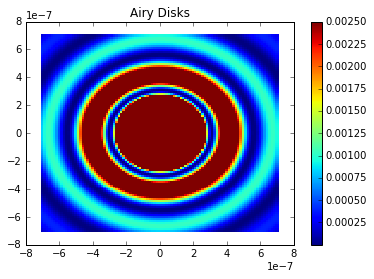

In [57]:
plt.pcolormesh(X,Y,Z,vmax=0.0025)
plt.title("Airy Disks")
plt.colorbar()
plt.show()

Play with `vmax` to try to resolve the Airy disks. I got mine to work for `vmax=0.01`.


### X. Extra credit

Refer to the `matplotlib` documentation (or any other resource) to play with the plot options. Change the aspect ratio so that the x- and y- spacings are equal... in other words: make circles look like circles, not ovals. Also play with the color schemes. Can you make a plot that looks like something an astronomer would see (white for areas where there are photons, black for areas where there are no photons). Can you put a plot legend that quantifies the intensity of the plot?

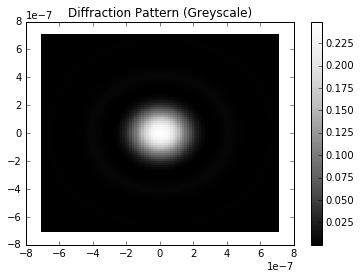

In [58]:
plt.pcolormesh(X,Y,Z,cmap=plt.cm.Greys_r)
plt.title("Diffraction Pattern (Greyscale)")
plt.colorbar()
plt.show()

## 2. Gaussian Quadrature

Download the implementation of **Gaussian Quadrature** from Mark Newman's *Computational Physics* website, or use the copy of `gaussxw.py` included in this GitHub repo. 

A sample program is provided below. Note how the package is called using  
`from gaussxw import gaussxw`  
... this assumes that `gaussxw.py` is in the same directory as this notebook.

Here's how the package works:

In [59]:
from gaussxw import gaussxw

def f(x):
    return x**4 - 2*x + 1

N=3    # number of steps
a=0.0  # lower limit of integration
b=2.0  # upper limit of integration

x,w = gaussxw(N)
# gaussxw(N) returns the sample points x and weights w
# for the reference integral (-1,1)

# Now define x' and w' to be the sample points and weights
# for the interval (a,b). We derived this transformation
# in lecture 5.
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Now estimate the integral of f by summing
# the sample points and the weights
total = 0.0
for k in range(N):
    total += wp[k]*f(xp[k])
    
#print(s)

To better understand this, actually print the inputs and outputs

In [60]:
print(x)
print(w)

[  7.74596669e-01  -8.96888137e-17  -7.74596669e-01]
[ 0.55555556  0.88888889  0.55555556]


### A. Plotting the weights
Create a histogram (or scatter plot) of the sample points and weights that come from the Gaussian quadrature procedure as encoded in `gaussxw`. You should have a plot whose y-axis is the weight, and whose x-axis is the sample position. 

Note: you will have to convert the Python arrays that `gaussxw` outputs into Numpy arrays. You can do this with `np.array(x)` where `x` is a Python array.

Make separate plots for $N = 5, 110, 100$.

In [61]:
def xs_and_ws(N):
    x,w=gaussxw(N)
    plt.scatter(x,w)
    plt.show()
    return

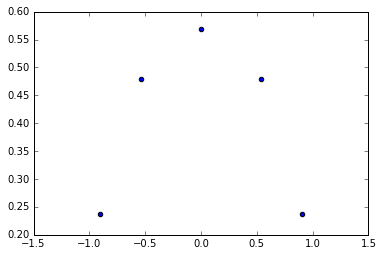

In [62]:
xs_and_ws(5)

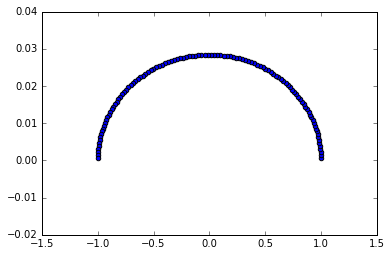

In [63]:
xs_and_ws(110)

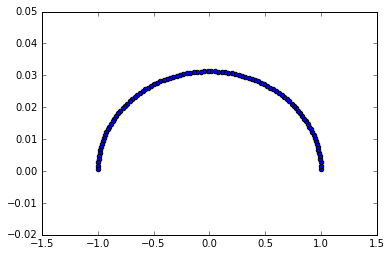

In [64]:
xs_and_ws(100)

Redo the steps in Problem 1A and Problem 1B using **Gaussian quadrature** rather than Simpson's rule. Use `gaussxw` as shown above. 

In order to do this, you'll need a way a way to get $J_m(x)$ samples. I suggest using the built in "Bessel function of the first kind" function in `scipy`.

You may need to install `scipy` using the following command at the terminal  
`pip3 install scipy`

In [65]:
from scipy.special import jv as jv  # jv is the J_m from above

print(jv(1,1))## compare this with J(1,1) from Problem 1
print J(1,1)

0.440050585745
0.440050585745


In [66]:
# Your code here!
# Code the Bessel functions as the integral representation shown above
# ... except now use jv(m,x) to sample the Bessel functions
# ... and focus on the range x in (0,20)
# ... and use Gaussian quadrature to do the integration

# Then plot your Bessel functions, confirm that they match what you got in Problem 1

from gaussxw import gaussxwab

def gauss_quad_int(f,a,b,N):
    """Integrate f from a to b using Gaussian Quadrature with N steps"""
    b=float(b)
    a=float(a)
    x,w=gaussxwab(N,a,b)
    answer=0
    for i in range(0,len(x)):
        answer+=w[i]*f(x[i])
    return answer       
    

In [67]:
gauss_quad_int(test_function,0,1,100)

0.99999999999999856

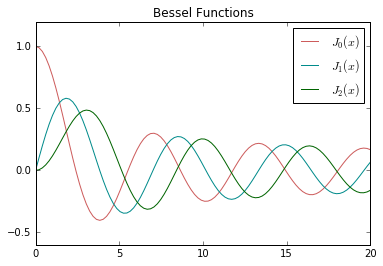

In [68]:
x = np.linspace(0, 20, 100)

# Create a "vectorized" version of J(m,x) that 
# accepts Numpy arrays as arguments
jvnp = np.vectorize(jv)

colors=['indianred','darkcyan','darkgreen']
for m in range(0,3):
    plt.plot(x,jvnp(m,x),label='$J_'+str(m)+'(x)$',color=colors[m])

plt.title("Bessel Functions")
plt.legend()
plt.show()

### X Extra Credit: small sampling

Your Bessel function plots in Problem 1 and 2 should look the same. See what happens if we become "cheap" with our number of samplings. Plot the Bessel functions using Simpsons rule and using Gaussiand quadrature for low values of $N$. 

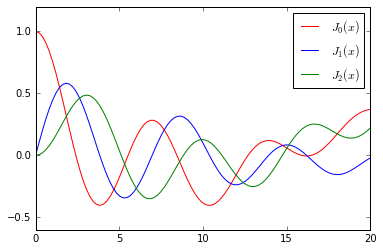

In [69]:
colors=['red','blue','green']
for m in range(0,3):
    plt.plot(x,Jnp(m,x,N=10),label='$J_'+str(m)+'(x)$',color=colors[m])
plt.legend()
plt.show()

## 3. Simpson's Rule Error from HW1

If you did things correctly in HW1, you will have noticed that your errors using Simpsons rule for a function of the form $f(x) = ax^2$ were strange: they were small and didn't scale as you'd expect. 

### A. Explain why

In your own words, explain why this happened. What would you expect from a function of the form $f(x) = ax^3$?

**Hint**: in class we argued that the approximation error using the trapezoidal rule was  
$\displaystyle \epsilon = \frac{1}{12} \delta x^2 \left[ f'(a) - f'(b) \right]$.  


### X. Extra credit

Following Chapter 5.2 of Newman's *Computational Physics*, derive the factor of $1/12$ in the above expression for $\epsilon$. (This derivation is also the lecture 5 notes.) Derive the analogous approximation error for Simpson's rule. It has the form:

$\displaystyle \epsilon = \frac{1}{?} \Delta x^4 \left[ \cdots ? \cdots \right]$ .

## Part A answer
In HW1, the error in the Simpson's rule integration of a function of the form $\,f(x)=ax^2\,$ is zero because we fit $\,f(x)\,$ to a function of the same form. This is analagous to finding the area of a rectangle by splitting the rectangle up into smaller rectangles and adding their areas (Riemann Sum). 

For a function of the form $\,f(x)=ax^3$, Simpson's rule would ***not*** yield an error of zero. I would expect the error to decrease as the number of steps increases until we reach the $\,10^{-16}\,$ error limit--after which, it would decrease.

# Extra credit answer

$\newcommand{\intf}{\int_a^bf(x)\,dx}%
\newcommand{\intk}{\int_{x_{k-1}}^{x_k}f(x)\,dx}%
\newcommand{\intdx}{\int_0^{\Delta x}f(x)\,dx}$

We can break up the integral $\intf$ into a sum of smaller integrals...
$$\int_a^bf(x)\,dx=\sum_{k=1}^N\intk=\sum_{k=1}^N\intdx$$

Taylor expanding $\intf$ about $x_0$ gives...
$$\intf=\int_a^bdx\,[f(x_0)+(x-x_0)\,f'(x_0)+\frac{1}{2}(x-x_0)^2\,f''(x_0)+...]$$

If we let $x_0=x_{k-1}$, the expansion becomes...
$$\intdx=f(x_{k-1})\,\Delta x+\frac{1}{2}f'(x_{k-1})\,(\Delta x)^2+\frac{1}{6}f''(x_{k-1})\,(\Delta x)^3+...$$

Similarly, for $x_0=x_{k}$...
$$\intdx=f(x_{k})\,\Delta x+\frac{1}{2}f'(x_{k})\,(\Delta x)^2+\frac{1}{6}f''(x_{k})\,(\Delta x)^3+...$$

Averaging the previous two expressions gives...
$$\intk=\frac{1}{2}\Delta x\,[f(x_{k-1})+f(x_{k})]+\frac{1}{4}(\Delta x)^2\,[f'(x_{k-1})-f'(x_{k})]+\frac{1}{12}(\Delta x)^3\,[f''(x_{k-1})+f''(x_{k})]+...$$
So...
$$\intf=\sum_{k=1}^N\intk=\frac{1}{2}\Delta x\,\sum_{k=1}^N[f(x_{k-1})+f(x_{k})]+\frac{1}{4}(\Delta x)^2\,\sum_{k=1}^N[f'(x_{k-1})-f'(x_{k})]+\\\frac{1}{12}(\Delta x)^3\,\sum_{k=1}^N[f''(x_{k-1})+f''(x_{k})]+...$$

## Part one: error in trapezoidal rule
Notice that the expression, $\frac{1}{2}\Delta x\,\sum_{k=1}^N[f(x_{k-1})+f(x_{k})]$, is the approximation we use for Trapezoidal rule. Additionally, the expression, $\frac{1}{2}\Delta x\,\sum_{k=1}^N[f''(x_{k-1})+f''(x_{k})]$, is the Trapazoidal rule approximation of $\int_a^bf''(x)\,dx$. So...

$$\frac{1}{12}(\Delta x)^3\,\sum_{k=1}^N\,\{[f''(x_{k-1})+f''(x_{k})]=\frac{1}{6}(\Delta x)^2\int_a^bf''(x)\,dx+...=\frac{1}{6}(\Delta x)^2[f'(b)-f'(a)]\}+...$$

Putting all this together...
$$\intf=\sum_{k=1}^N\intk=\frac{1}{2}\Delta x\,\sum_{k=1}^N[f(x_{k-1})+f(x_{k})]+\frac{1}{12}(\Delta x)^2[f'(b)-f'(a)]+...$$

The last term is the error for trapezoidal rule. For small intervals...
$$\boxed{\epsilon=\frac{1}{12}(\delta x)^2[f'(b)-f'(a)]}$$

## Part two: error in Simpson's rule
Part one took **way** too long to type. Here's the answer from the book...
$$\boxed{\epsilon=\frac{1}{90}(\Delta x)^4[f'''(a)-f'''(b)]}$$



## X Extra Credit: animations

Refer to: https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
(Or any other matplotlib animation tutorial)

Make an animated phase-shifted $J_0(x)$, analogous to the phase-shifted sine wave animation at the beginning of the above tutorial.

<IPython.core.display.Javascript object>


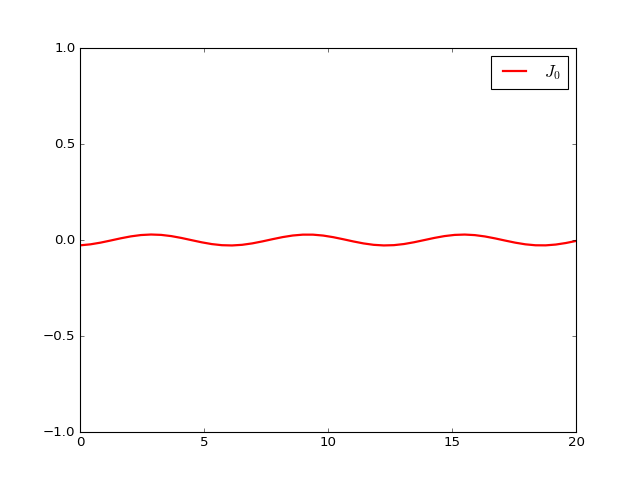

In [89]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation as ThisIsCool
from matplotlib import rc
from IPython.display import HTML
from tempfile import NamedTemporaryFile

fig=plt.figure()
ax=plt.axes(xlim=(0,20),ylim=(-1,1))
line0,=ax.plot([],[],lw=2,color='red',label='$J_0$')
#line1,=ax.plot([],[],lw=2,color='blue',label='$J_1$')
#line0_app,=ax.plot([],[],lw=2,color='red',ls='--',label='$J_0\,\,\mathrm{approximate\,\,function}$')
#line1_app,=ax.plot([],[],lw=2,color='blue',ls='--',label='$J_1\,\,\mathrm{approximate\,\,function}$')

def animate(i):
    x=np.linspace(0.01,20,50)
    y0=Jnp(0,x+i)
    #y1=Jnp(1,x+i)
    #y0_app=fmnp(0,x+i)
    #y1_app=fmnp(1,x+i)
    line0.set_data(x,y0)
    #line1.set_data(x,y1)
    #line0_app.set_data(x,y0_app)
    #line1_app.set_data(x,y1_app)
    return line0, #line1, line0_app, line1_app,

plt.legend(loc='upper right',fontsize=15)
anim=ThisIsCool(fig,animate,frames=1000,interval=1,blit=True)